# Problem Statement

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

For this company wants to know:

Which variables are important to predict the price of variable?

How do these variables describe the price of the house?

# Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

Importing the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Importing the training dataset

In [3]:
pd.set_option('display.max_rows',None)  #setting the display option to max
pd.set_option('display.max_columns',None)
train=pd.read_csv('train.csv')
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
5     1197          60       RL         58.0    14054   Pave   NaN      IR1   
6      561          20       RL          NaN    11341   Pave   NaN      IR1   
7     1041          20       RL         88.0    13125   Pave   NaN      Reg   
8      503          20       RL         70.0     9170   Pave   NaN      Reg   
9      576          50       RL         80.0     8480   Pave   NaN      Reg   
10     449          50       RM         50.0     8600   Pave   NaN      Reg   
11     833          60       RL         44.0     9548   Pave   NaN      IR1   
12     277          20       RL        129.0     9196   Pave   NaN      IR1   
13      84          20       RL         80.0     8892   Pave   NaN      IR1   
14     888          50       RL         59.0    16466   Pave   NaN      IR1   
15    1013          70       RL         55.0    10592   Pave   NaN      Reg   
16    1154          30       RM          NaN     5890   Pave   NaN      Reg   
17     728          20       RL         64.0     7314   Pave   NaN      Reg   
18     270          20       RL          NaN     7917   Pave   NaN      IR1   
19    1105         160       RM         24.0     2016   Pave   NaN      Reg   
20     259          60       RL         80.0    12435   Pave   NaN      Reg   
21    1407          85       RL         70.0     8445   Pave   NaN      Reg   
22    1459          20       RL         68.0     9717   Pave   NaN      Reg   
23     997          20       RL          NaN    10659   Pave   NaN      IR1   
24    1094          20       RL         71.0     9230   Pave   NaN      Reg   
25     114          20       RL          NaN    21000   Pave   NaN      Reg   
26    1384          30       RL          NaN    25339   Pave   NaN      Reg   
27     379          20       RL         88.0    11394   Pave   NaN      Reg   
28     556          45       RM         58.0     6380   Pave   NaN      Reg   
29     464          70       RL         74.0    11988   Pave   NaN      IR1   
30      46         120       RL         61.0     7658   Pave   NaN      Reg   
31     426          60       RM         60.0     3378   Pave  Grvl      Reg   
32    1231          90       RL          NaN    18890   Pave   NaN      IR1   
33     171          50       RM          NaN    12358   Pave   NaN      IR1   
34     869          60       RL          NaN    14762   Pave   NaN      IR2   
35     151          20       RL        120.0    10356   Pave   NaN      Reg   
36     859          20       RL         80.0    10400   Pave   NaN      Reg   
37     176          20       RL         84.0    12615   Pave   NaN      Reg   
38     361          85       RL          NaN     7540   Pave   NaN      IR1   
39     590          40       RM         50.0     9100   Pave   NaN      Reg   
40     172          20       RL        141.0    31770   Pave   NaN      IR1   
41     527          20       RL         70.0    13300   Pave   NaN      Reg   
42    1365         160       FV         30.0     3180   Pave  Pave      Reg   
43     146         160       RM         24.0     2522   Pave   NaN      Reg   
44    1006          80       RL         65.0     8385   Pave   NaN      Reg   
45     275          20       RL         76.0     8314   Pave   NaN      Reg   
46     380          60       RL         60.0     8123   Pave   NaN      IR1   
47    1309          20       RM        100.0    12000   Pave   NaN      Reg   
48     534          20       RL         50.0     5000   Pave   NaN      Reg   
49     494          20       RL         70.0     7931   Pa

In [4]:
train.shape #checking the shape of the dataset

(1168, 81)

it has 1168 rows and 81 columns

Importing the test dataset

In [5]:
test=pd.read_csv('test.csv')
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

Last five rows of the train & test dataset

In [6]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1163        31.0        TA        Gd     CBlock       TA       TA   
1164         0.0        TA        TA     CBlock      NaN      NaN   
1165         0.0        TA        TA     CBlock       Gd       TA   
1166         0.0        TA        Fa     BrkTil       TA       TA   
1167         0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1163           No          BLQ         450          Unf           0   
1164          NaN          NaN           0          NaN           0   
1165           No          ALQ         566          Unf           0   
1166           No          Unf           0          Unf           0   
1167           No          GLQ         457          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1163        432          882    GasA        TA          Y      SBrkr   
1164          0            0    GasA        Ex          Y      SBrkr   
1165        289          855    GasA        TA          Y      SBrkr   
1166        649          649    GasA        TA          N      SBrkr   
1167        326          783    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1163       900         0             0        900             0             0   
1164      1126         0             0       1126             0             0   
1165       855       601             0       1456             0             0   
1166       649       668             0       1317             0             0   
1167       807       702             0       1509             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1163         1         0             3             1          TA   
1164         2         0             2             1          Gd   
1165         2         1             3             1          TA   
1166         1         0             3             1          TA   
1167         2         1             3             1          Gd   

      To

In [7]:
test.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
287         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
288         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
289         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
291         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
287       Norm     1Fam     1Story            8            5       2007   
288       Norm     1Fam     1Story            5            5       1994   
289       Norm     1Fam     1Story            6            7       1970   
290       Norm     1Fam     1.5Fin            6            7       1947   
291       Norm    Twnhs     2Story            6            5       1973   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
287          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
288          1995     Gable  CompShg     VinylSd     VinylSd       None   
289          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
291          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
287       468.0        TA        TA      PConc       Gd       TA           No   
288         0.0        TA        TA      PConc       Gd       TA           No   
289       180.0        TA        TA     CBlock       TA       TA           No   
290         0.0        TA        Gd     CBlock       TA       TA           No   
291       408.0        TA        TA     CBlock       TA       Fa           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
287          GLQ          33          Unf           0       1530         1563   
288          GLQ         686          Unf           0        304          990   
289          ALQ         578          Unf           0        426         1004   
290          ALQ         399          Unf           0        605         1004   
291          BLQ         309          Unf           0        174          483   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
287    GasA        Ex          Y      SBrkr      1563         0             0   
288    GasA        Ex          Y      SBrkr       990         0             0   
289    GasA        Ex          Y      SBrkr      1004         0             0   
290    GasA        Ex          Y      SBrkr      1004       660             0   
291    GasA        TA          Y      SBrkr       483       504             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
287       1563             0             0         2         0             3   
288        990             0             1         1         0             3   
289       1004             1             0         1         0             2   
290       1664             0             0         2         0             3   
291        987             0             0         1         1             2   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
287             1          Gd             6        Typ           1   
288             1          TA             5        Typ           0   
289             1          TA             5  

Shape of both the train & test dataset

In [8]:
print('Shape of training dataset: ',train.shape)
print('Shape of testing dataset: ',test.shape)

Shape of training dataset:  (1168, 81)
Shape of testing dataset:  (292, 80)


Columns of the train & test dataset

In [9]:
train.columns #contains the sale price column

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
test.columns #the sale price is to be predicted

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

A brief info about the train & test dataset columns

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

Checking the Null Values

In [13]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

We have so many columns with null values which needs to be filled

<AxesSubplot:>

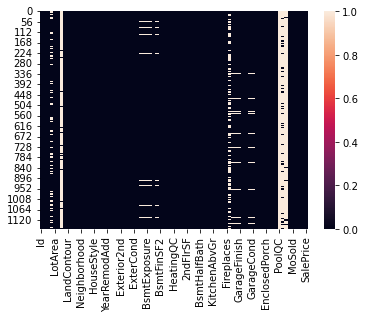

In [14]:
sns.heatmap(train.isnull())  #null values using the heatmap

In [15]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

Test dataset also have null values which needs to be filled separately

<AxesSubplot:>

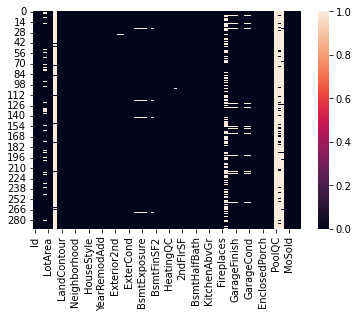

In [16]:
sns.heatmap(test.isnull())  #null values using heatmap

Dropping the columns which have more than 50% null values from both the test & train dataset

In [17]:
train.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [18]:
test.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [19]:
train.shape

(1168, 77)

In [20]:
test.shape

(292, 76)

Dealing with the Null Values

In [21]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['MasVnrType']=train['MasVnrType'].fillna('None')
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
train['BsmtQual']=train['BsmtQual'].fillna('TA')
train['BsmtCond']=train['BsmtCond'].fillna('TA')
train['BsmtExposure']=train['BsmtExposure'].fillna('No')
train['BsmtFinType1']=train['BsmtFinType1'].fillna('Unf')
train['BsmtFinType2']=train['BsmtFinType2'].fillna('Unf')
train['FireplaceQu']=train['FireplaceQu'].fillna('Gd')
train['GarageType']=train['GarageType'].fillna('Attached')
train['GarageYrBlt']=train['GarageYrBlt'].fillna(2006.6)
train['GarageFinish']=train['GarageFinish'].fillna('Unf')
train['GarageQual']=train['GarageQual'].fillna('TA')
train['GarageCond']=train['GarageCond'].fillna('TA')

In [22]:
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['MasVnrType']=test['MasVnrType'].fillna('None')
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['BsmtQual']=test['BsmtQual'].fillna('TA')
test['BsmtCond']=test['BsmtCond'].fillna('TA')
test['BsmtExposure']=test['BsmtExposure'].fillna('No')
test['BsmtFinType1']=test['BsmtFinType1'].fillna('Unf')
test['BsmtFinType2']=test['BsmtFinType2'].fillna('Unf')
test['FireplaceQu']=test['FireplaceQu'].fillna('Gd')
test['GarageType']=test['GarageType'].fillna('Attached')
test['GarageYrBlt']=test['GarageYrBlt'].fillna(2006.6)
test['GarageFinish']=test['GarageFinish'].fillna('Unf')
test['GarageQual']=test['GarageQual'].fillna('TA')
test['GarageCond']=test['GarageCond'].fillna('TA')
test['Electrical']=test['Electrical'].fillna('SBrkr')

In [23]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [24]:
test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

Now there is no null values in both the dataset

# Which street house has higher price?

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

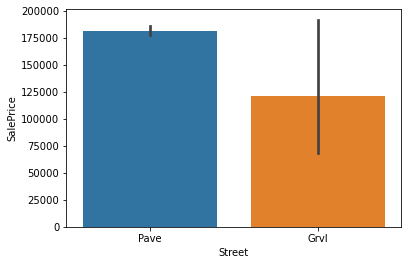

In [25]:
sns.barplot(train['Street'],train['SalePrice'])

House in Pave street have higher sale price

What type of Land Contour has higher sale price?

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

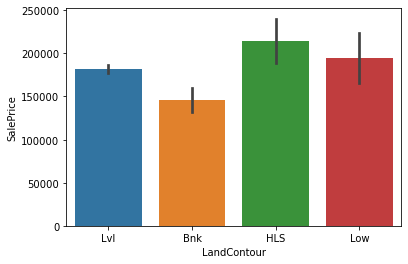

In [26]:
sns.barplot(train['LandContour'],train['SalePrice'])

HLS type houses has higher sale price

What Lot configuration is in higher demand?

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

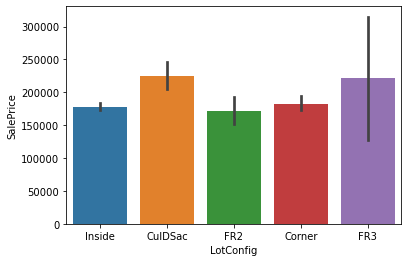

In [27]:
sns.barplot(train['LotConfig'],train['SalePrice'])

CulDSac followed by FR3 lot configuration are in higher demand.

# Whose neighborhood increased the sale price?

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

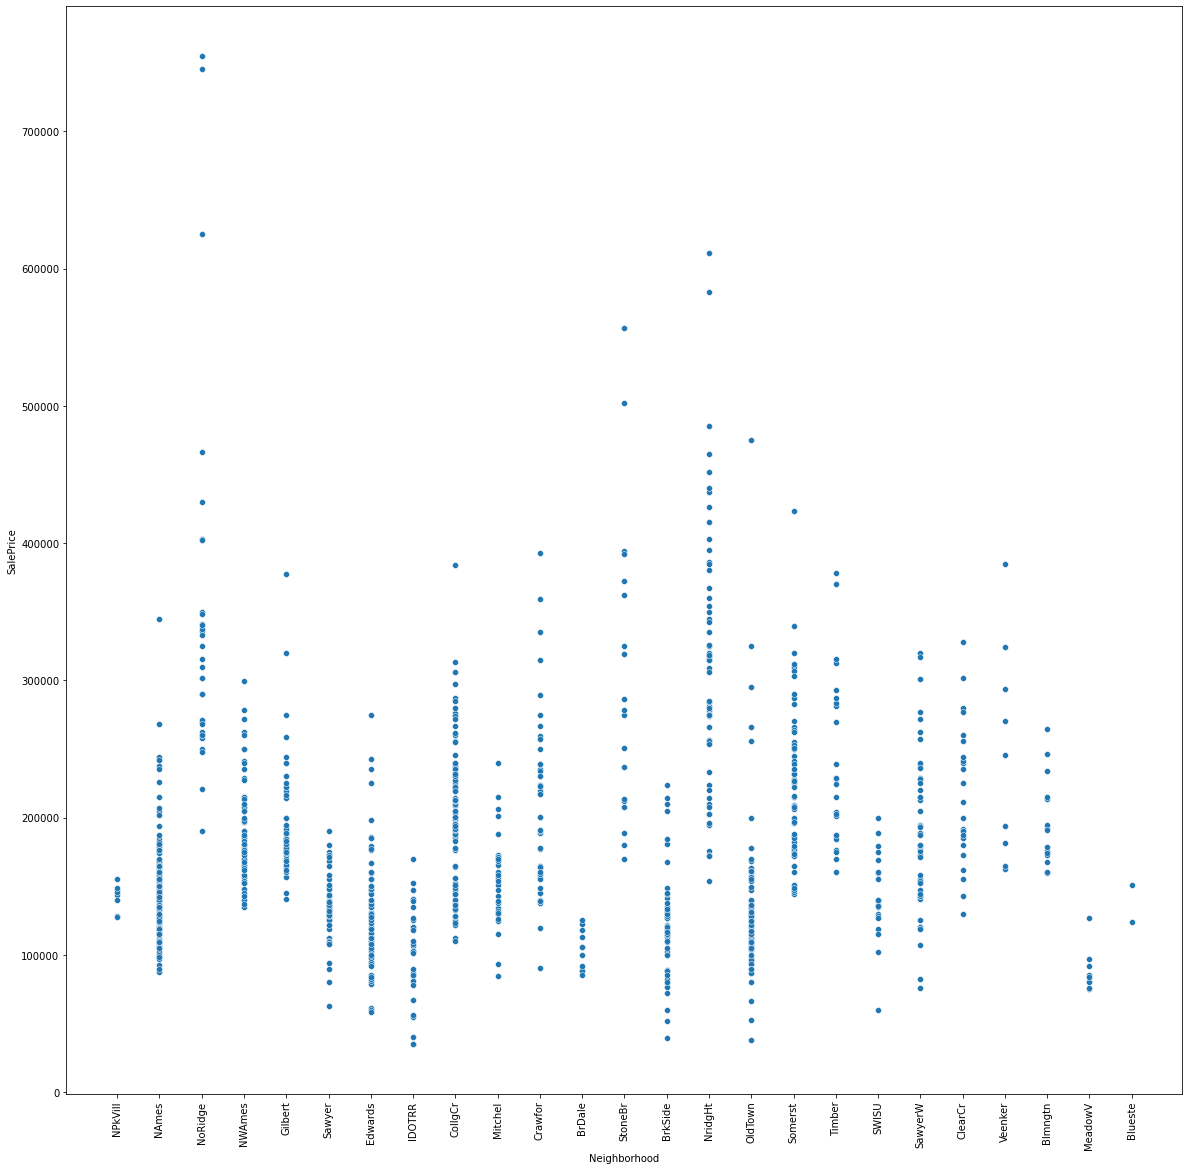

In [28]:
plt.figure(figsize=(20,20))
sns.scatterplot(train['Neighborhood'],train['SalePrice'])
plt.xticks(rotation=90)

The one who has NoRidge & NridgHt in their neighborhood has the high sale price. The one who has NPkVill & Bluestee in the nighborhood are on the lower side

# Which house style has high sale price?

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

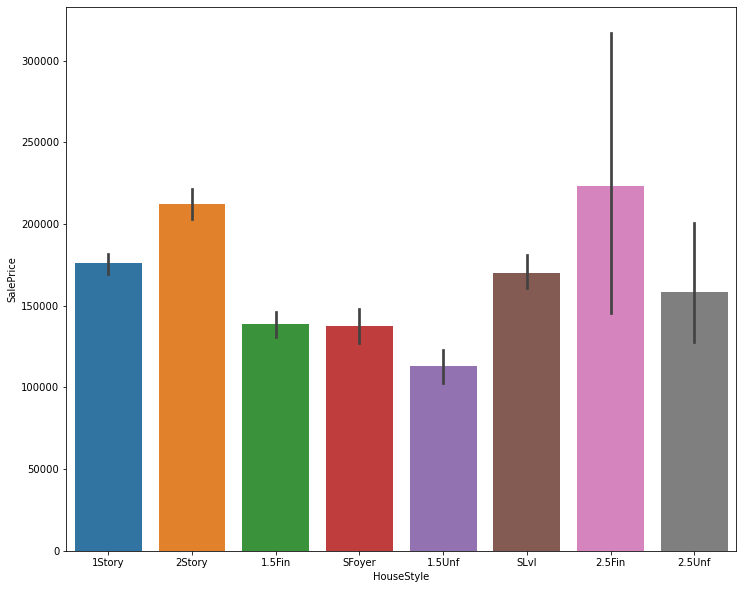

In [29]:
plt.figure(figsize=(12,10))
sns.barplot(train['HouseStyle'],train['SalePrice'])

The 2.5Fin has the highest sale price followed by 2Story and 1.5Unf has the lowest sale price

# How lot area affects the price?

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

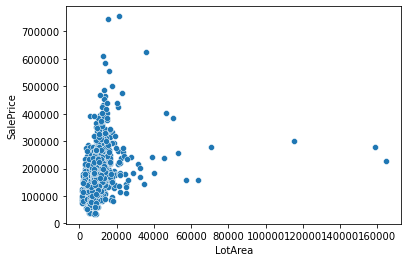

In [30]:
sns.scatterplot(train['LotArea'],train['SalePrice'])

Most of the houses have low lot area, very little on the higher side & the price is very high for some of the houses.

# How land slope affects the price?

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

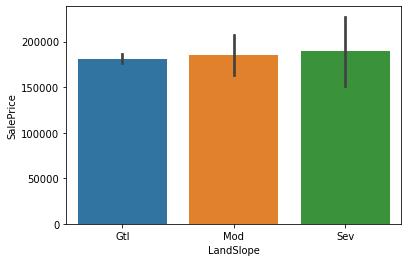

In [31]:
sns.barplot(train['LandSlope'],train['SalePrice'])

Land slope doesn't affect the price much more, it is same almost for every type.

# What type of building has high sale price?

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

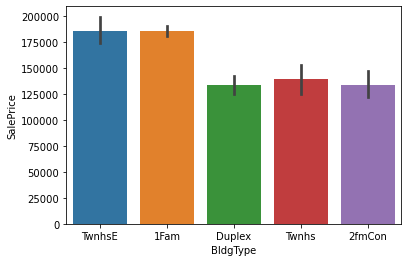

In [32]:
sns.barplot(train['BldgType'],train['SalePrice'])

TwnhsE & 1Farm type buildings are on higher side.

# OverallQual Vs Price

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

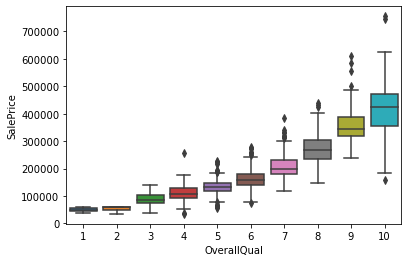

In [33]:
sns.boxplot(train['OverallQual'],train['SalePrice'])

A higer overall quality grade means a higher sale price.

# Overall Condition Vs Sale Price

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

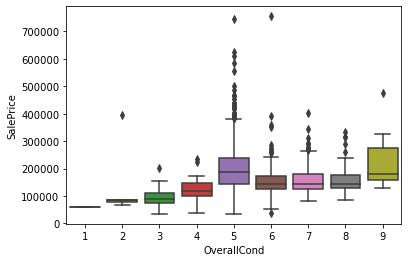

In [34]:
sns.boxplot(train['OverallCond'],train['SalePrice'])

Whose overall condition is around 5 touches the higher side of price

# Year built Vs Sale Price

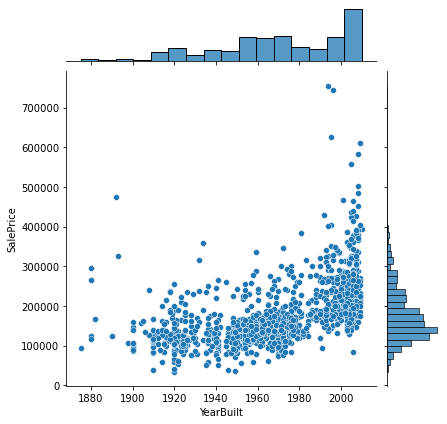

In [35]:
sns.jointplot(train['YearBuilt'],train['SalePrice'])

Newer houses sale price is high as compared to old houses but there are also some old houses whose sale price is high

# YearRemodAdd Vs Sale Price

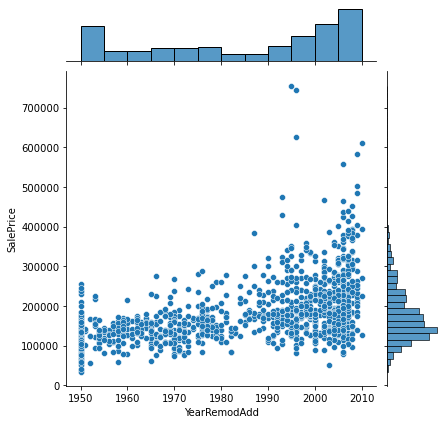

In [36]:
sns.jointplot(train['YearRemodAdd'],train['SalePrice'])

We almost have a distributed data in this but yes newer one has higher price than older one.

# Which roof style & material increases the price of a house?

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

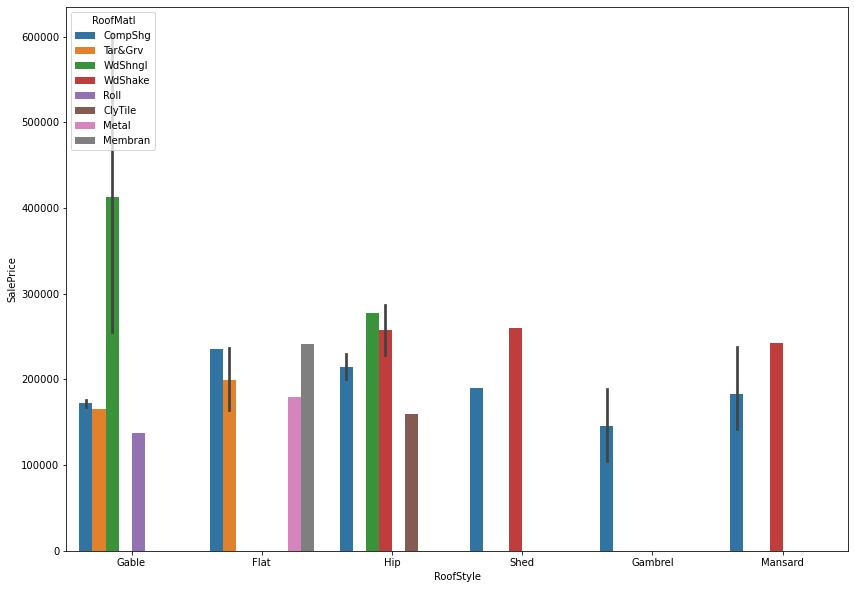

In [37]:
plt.figure(figsize=(14,10))
sns.barplot(train['RoofStyle'],train['SalePrice'],hue=train['RoofMatl'])

A house with Gable roof style and made of WdShngl shown up a with higher sale price

Which exterior contribute more towards sale price?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Plywood'),
  Text(1, 0, 'Wd Sdng'),
  Text(2, 0, 'MetalSd'),
  Text(3, 0, 'CemntBd'),
  Text(4, 0, 'VinylSd'),
  Text(5, 0, 'HdBoard'),
  Text(6, 0, 'Stucco'),
  Text(7, 0, 'WdShing'),
  Text(8, 0, 'BrkFace'),
  Text(9, 0, 'Stone'),
  Text(10, 0, 'AsbShng'),
  Text(11, 0, 'AsphShn'),
  Text(12, 0, 'ImStucc'),
  Text(13, 0, 'BrkComm')])

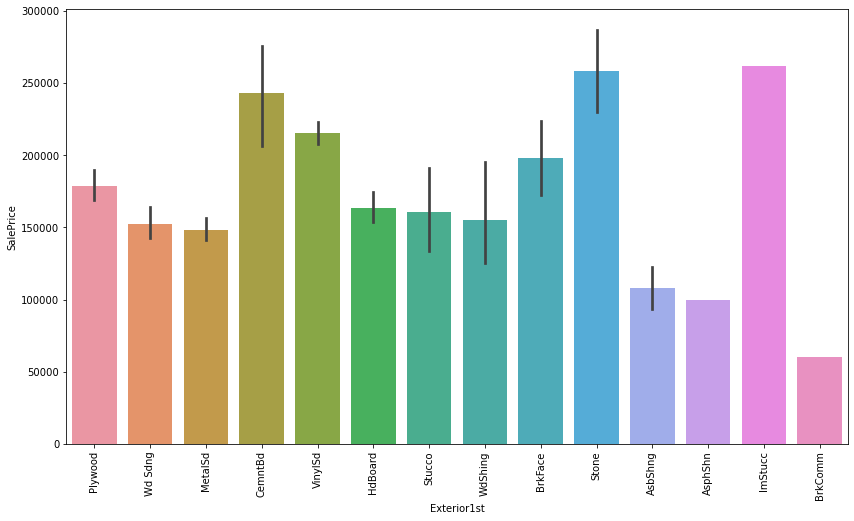

In [38]:
plt.figure(figsize=(14,8))
sns.barplot(train['Exterior1st'],train['SalePrice'],)
plt.xticks(rotation=90)

ImStucc & Stone followed by CementBd exterior sale price is high compare to others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Plywood'),
  Text(1, 0, 'Wd Sdng'),
  Text(2, 0, 'MetalSd'),
  Text(3, 0, 'CmentBd'),
  Text(4, 0, 'VinylSd'),
  Text(5, 0, 'HdBoard'),
  Text(6, 0, 'Wd Shng'),
  Text(7, 0, 'Stucco'),
  Text(8, 0, 'ImStucc'),
  Text(9, 0, 'Stone'),
  Text(10, 0, 'BrkFace'),
  Text(11, 0, 'AsbShng'),
  Text(12, 0, 'Brk Cmn'),
  Text(13, 0, 'AsphShn'),
  Text(14, 0, 'Other')])

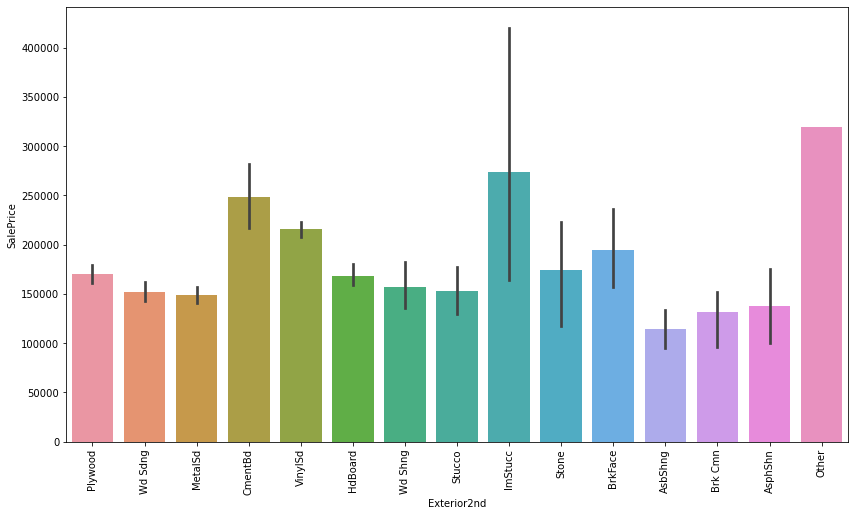

In [39]:
plt.figure(figsize=(14,8))
sns.barplot(train['Exterior2nd'],train['SalePrice'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

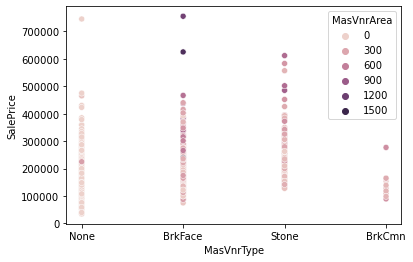

In [40]:
sns.scatterplot(train['MasVnrType'],train['SalePrice'],hue=train['MasVnrArea'])

We have almost distributed data for all types but yes outliers are there.

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

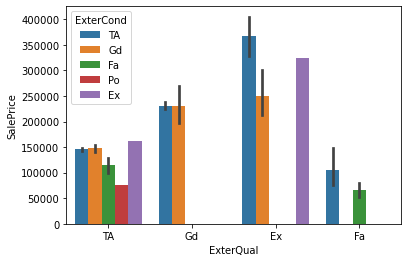

In [41]:
sns.barplot(train['ExterQual'],train['SalePrice'],hue=train['ExterCond'])

Exterior Quality is Excellent & Exterior COndition is TA then it is pretty sure that house sale price is going to be high

# How the foundation of the house defines the price?

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

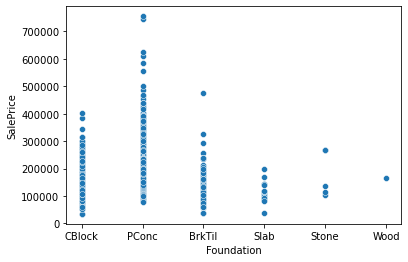

In [42]:
sns.scatterplot(train['Foundation'],train['SalePrice'])

One's whose foundation is P Conc then this house might have a good price followed by CBlock

# Basement condition Vs Price

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

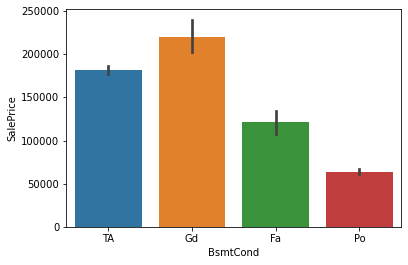

In [43]:
sns.barplot(train['BsmtCond'],train['SalePrice'])


Whose condition is GD or TA then obviously getting the higher sale price

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

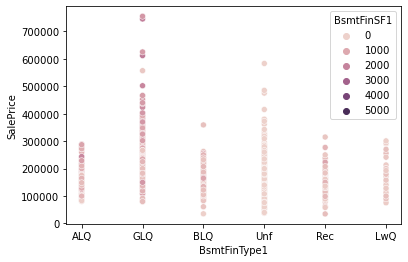

In [44]:
sns.scatterplot(train['BsmtFinType1'],train['SalePrice'],hue=train['BsmtFinSF1'])

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

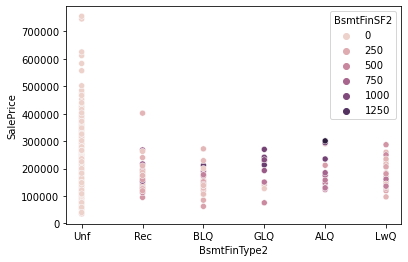

In [45]:
sns.scatterplot(train['BsmtFinType2'],train['SalePrice'],hue=train['BsmtFinSF2'])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

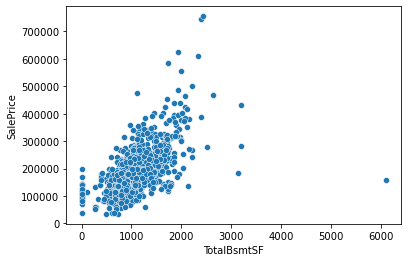

In [46]:
sns.scatterplot(train['TotalBsmtSF'],train['SalePrice'])

Total basement area also affects the price, ones having basement are grtting the high rates

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

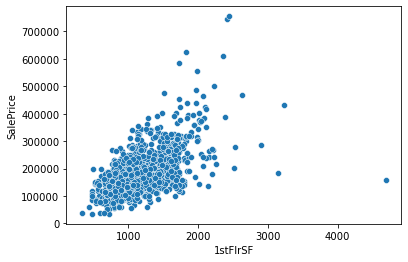

In [47]:
sns.scatterplot(train['1stFlrSF'],train['SalePrice'])

Most of the house 1st Floor SF are on lower side with great prices

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

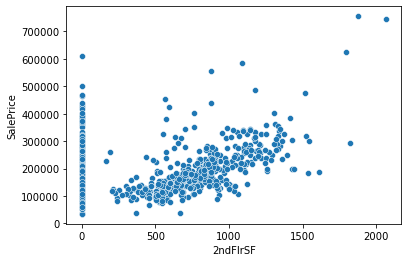

In [48]:
sns.scatterplot(train['2ndFlrSF'],train['SalePrice'])

There are lot of houses don't have the second floor but ones having the second floor have the higher rates

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

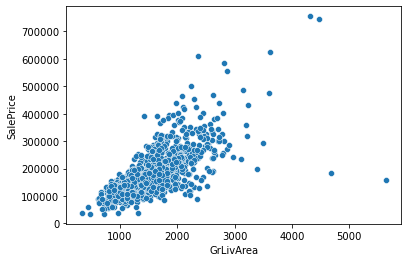

In [49]:
sns.scatterplot(train['GrLivArea'],train['SalePrice'])

almost all the houses hava smaller livng area but yes few are are there whos area is high as well as price

# Total Rms above ground Vs Sale price

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

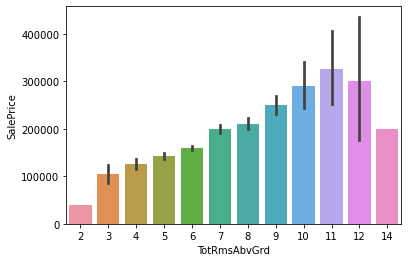

In [50]:
sns.barplot(train['TotRmsAbvGrd'],train['SalePrice'])

with a 9, 10 & 11 you sale price is going to be good

# Year sold Vs Price

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

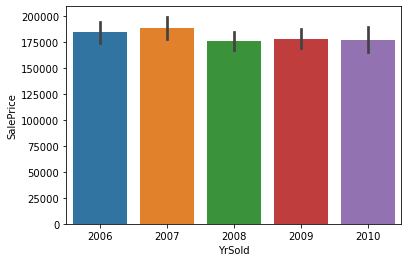

In [51]:
sns.barplot(train['YrSold'],train['SalePrice'])

Whatever be the year sale price doesn't affect too much.

Is saletype affect the sale price?

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

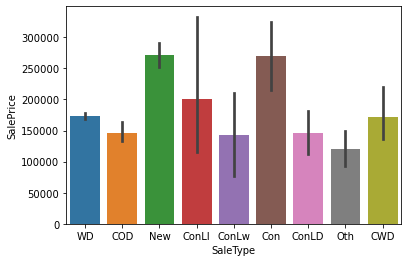

In [52]:
sns.barplot(train['SaleType'],train['SalePrice'])

Yes, if your sale type is Con or New then definitely you are going to get a good price

Label Encoding for both test & train dataset

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in train.columns:
    if train[i].dtypes=="object":
        train[i]=le.fit_transform(train[i].astype(str))
train.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  127         120         3     70.98847     4928       1         0   
1  889          20         3     95.00000    15865       1         0   
2  793          60         3     92.00000     9920       1         0   
3  110          20         3    105.00000    11751       1         0   
4  422          20         3     70.98847    16635       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0            13           2   
1            3          0          4          1            12           2   
2            3          0          1          0            15           2   
3            3          0          4          0            14           2   
4            3          0          2          0            14           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         4           2            6            5       1976   
1           2         0           2            8            6       1970   
2           2         0           5            7            5       1996   
3           2         0           2            6            6       1977   
4           2         0           2            6            7       1977   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          1976          1         1            8            9           2   
1          1970          0         5           12           13           2   
2          1997          1         1            7            7           2   
3          1977          3         1            8            9           1   
4          2000          1         1            4            4           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          3          4           1         2         3   
1         0.0          2          2           2         3         1   
2         0.0          2          4           2         2         3   
3       480.0          3          4           1         2         3   
4       126.0          2          4           1         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             0         120             5           0   
1             1             0         351             4         823   
2             0             2         862             5           0   
3             3             1         705             5           0   
4             3             0        1246             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        958         1078        1          4           1           4   
1       1043         2217        1          0           1           4   
2        255         1117        1          0           1           4   
3       1139         1844        1          0           1           4   
4        356         1602        1          2           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             2             1            3             5   
1         2         0             4             1            2             8   
2         2         1             3             1            3             8   
3         2         0             3             1            3             7   
4         2         

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in test.columns:
    if test[i].dtypes=="object":
        test[i]=le.fit_transform(test[i].astype(str))
test.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   337          20         2    86.000000    14157       1         0   
1  1018         120         2    66.425101     5814       1         0   
2   929          20         2    66.425101    11838       1         3   
3  1148          70         2    75.000000    12000       1         3   
4  1227          60         2    86.000000    14598       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          0          0          0            21           2   
1            3          0          1          0            21           2   
2            3          0          4          0             4           2   
3            0          0          4          0             5           2   
4            3          0          1          0            20           1   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         0           2            9            5       2005   
1           0         4           2            8            5       1984   
2           0         0           2            8            5       2001   
3           0         0           5            7            7       1941   
4           0         0           5            6            5       2007   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2006          3         0            9           11           3   
1          1984          1         0            5            5           2   
2          2001          3         0            9           11           2   
3          1950          1         0            6            7           2   
4          2007          1         0            9           11           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       200.0          2          3           2         0         2   
1         0.0          2          3           1         2         2   
2         0.0          2          3           2         2         2   
3         0.0          3          3           1         3         2   
4        74.0          2          3           2         2         2   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             2        1249             5           0   
1             0             2        1036             5           0   
2             0             5           0             5           0   
3             3             4         275             5           0   
4             2             5           0             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        673         1922        0          0           1           3   
1        184         1220        0          2           1           3   
2       1753         1753        0          0           1           3   
3        429          704        0          0           1           3   
4        894          894        0          0           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0      1922         0             0       1922             1             0   
1      1360         0             0       1360             1             0   
2      1788         0             0       1788             0             0   
3       860       704             0       1564             0             0   
4       894      1039             0       1933             0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             3             1            2             8   
1         1         0             1             1            2             4   
2         2         0             3             1            0             7   
3         1         1             3             1            1             7   
4         2    

# Statistical Summary

In [55]:
train.describe()

Id   MSSubClass     MSZoning  LotFrontage        LotArea  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean    724.136130    56.767979     3.013699    70.988470   10484.749144   
std     416.159877    41.940650     0.633120    22.437056    8957.442311   
min       1.000000    20.000000     0.000000    21.000000    1300.000000   
25%     360.500000    20.000000     3.000000    60.000000    7621.500000   
50%     714.500000    50.000000     3.000000    70.988470    9522.500000   
75%    1079.500000    70.000000     3.000000    79.250000   11515.500000   
max    1460.000000   190.000000     4.000000   313.000000  164660.000000   

            Street     LotShape  LandContour  Utilities    LotConfig  \
count  1168.000000  1168.000000  1168.000000     1168.0  1168.000000   
mean      0.996575     1.938356     2.773973        0.0     3.004281   
std       0.058445     1.412262     0.710027        0.0     1.642667   
min       0.000000     0.000000     0.000000        0.0     0.000000   
25%       1.000000     0.000000     3.000000        0.0     2.000000   
50%       1.000000     3.000000     3.000000        0.0     4.000000   
75%       1.000000     3.000000     3.000000        0.0     4.000000   
max       1.000000     3.000000     3.000000        0.0     4.000000   

         LandSlope  Neighborhood   Condition1   Condition2     BldgType  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000   
mean      0.064212     12.145548     2.032534     2.005993     0.476027   
std       0.284088      6.010364     0.871703     0.250035     1.180870   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.000000      7.000000     2.000000     2.000000     0.000000   
50%       0.000000     12.000000     2.000000     2.000000     0.000000   
75%       0.000000     17.000000     2.000000     2.000000     0.000000   
max       2.000000     24.000000     8.000000     7.000000     4.000000   

        HouseStyle  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean      3.043664     6.104452     5.595890  1970.930651   1984.758562   
std       1.898625     1.390153     1.124343    30.145255     20.785185   
min       0.000000     1.000000     1.000000  1875.000000   1950.000000   
25%       2.000000     5.000000     5.000000  1954.000000   1966.000000   
50%       2.000000     6.000000     5.000000  1972.000000   1993.000000   
75%       5.000000     7.000000     6.000000  2000.000000   2004.000000   
max       7.000000    10.000000     9.000000  2010.000000   2010.000000   

         RoofStyle     RoofMatl  Exterior1st  Exterior2nd   MasVnrType  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      1.402397     1.086473     8.659247     9.363014     1.758562   
std       0.832539     0.642848     3.097443     3.462380     0.611174   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     1.000000     7.000000     7.000000     1.000000   
50%       1.000000     1.000000    11.000000    11.000000     2.000000   
75%       1.000000     1.000000    11.000000    12.000000     2.000000   
max       5.000000     7.000000    13.000000    14.000000     3.000000   

        MasVnrArea    ExterQual    ExterCond   Foundation     BsmtQual  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean    102.310078     2.530822     3.725171     1.395548     2.282534   
std     182.047152     0.699425     0.744463     0.709379     0.857830   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     2.000000     4.000000     1.000000     2.000000   
50%       0.000000     3.000000     4.000000     1.000000     2.000000   
75%     160.000000     3.000000     4.000000     2.000000     3.000000   
max    1600.000000     3.000000     4.000000     5.000000     3.000000 

# Correlation

In [56]:
corr=train.corr()
corr

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.004259  0.009307    -0.005969 -0.029212   
MSSubClass     0.004259    1.000000  0.007478    -0.336681 -0.124151   
MSZoning       0.009307    0.007478  1.000000    -0.069661 -0.023328   
LotFrontage   -0.005969   -0.336681 -0.069661     1.000000  0.299452   
LotArea       -0.029212   -0.124151 -0.023328     0.299452  1.000000   
Street         0.003613   -0.035981  0.140215    -0.035309 -0.263973   
LotShape       0.022978    0.104485  0.053655    -0.144523 -0.189201   
LandContour   -0.020245   -0.021387  0.001175    -0.073451 -0.159038   
Utilities           NaN         NaN       NaN          NaN       NaN   
LotConfig      0.053927    0.076880 -0.027246    -0.192468 -0.152063   
LandSlope      0.007152   -0.014930 -0.023952     0.046051  0.395410   
Neighborhood  -0.014989    0.013918 -0.251833     0.065824  0.010707   
Condition1     0.000425   -0.042474 -0.025651    -0.025581  0.029520   
Condition2     0.031623   -0.044319  0.031959     0.011761  0.040096   
BldgType       0.026302    0.731815 -0.024776    -0.403220 -0.215345   
HouseStyle     0.014518    0.381585 -0.110991     0.056321 -0.040637   
OverallQual   -0.036965    0.070462 -0.134037     0.229218  0.107188   
OverallCond    0.039761   -0.056978  0.189553    -0.047573  0.017513   
YearBuilt     -0.016942    0.023988 -0.299732     0.112655  0.005506   
YearRemodAdd  -0.018590    0.056618 -0.174586     0.088799  0.027228   
RoofStyle      0.037059   -0.100641  0.000913     0.146222  0.038615   
RoofMatl      -0.023900   -0.032214  0.009719     0.082566  0.194142   
Exterior1st   -0.045575   -0.090178 -0.012037     0.087727  0.048265   
Exterior2nd   -0.045721   -0.120022  0.005548     0.110762  0.027328   
MasVnrType     0.064161   -0.013252 -0.033521    -0.034388 -0.005204   
MasVnrArea    -0.060503    0.027813 -0.063862     0.188758  0.121086   
ExterQual     -0.006231   -0.024133  0.184815    -0.169835 -0.057865   
ExterCond      0.039946    0.004186 -0.099269     0.044582  0.011438   
Foundation    -0.006339    0.053951 -0.244844     0.090734 -0.021195   
BsmtQual       0.045212   -0.052242  0.123822    -0.176402 -0.075262   
BsmtCond       0.019818   -0.013220  0.002336     0.043165  0.010165   
BsmtExposure  -0.033328   -0.068192  0.037414    -0.123896 -0.136900   
BsmtFinType1   0.012860    0.017515  0.021518    -0.031507 -0.053584   
BsmtFinSF1     0.003868   -0.052236 -0.034161     0.228996  0.221851   
BsmtFinType2   0.037426    0.040573 -0.031322    -0.007509 -0.084713   
BsmtFinSF2     0.005269   -0.062403  0.027055     0.002159  0.056656   
BsmtUnfSF     -0.019494   -0.134170 -0.032638     0.113924  0.006600   
TotalBsmtSF   -0.013812   -0.214042 -0.058896     0.356107  0.259733   
Heating        0.041861    0.047734  0.051188    -0.026622 -0.020394   
HeatingQC      0.005955   -0.001994  0.119852    -0.078262 -0.003337   
CentralAir     0.003921   -0.113883 -0.015887     0.077404  0.051182   
Electrical     0.037801    0.045533 -0.079205     0.066868  0.050388   
1stFlrSF       0.009647   -0.227927 -0.033095     0.403436  0.312843   
2ndFlrSF      -0.029671    0.300366 -0.048968     0.089675  0.059803   
LowQualFinSF  -0.070180    0.053737  0.012098     0.007506 -0.001915   
GrLivArea     -0.024325    0.086448 -0.064125     0.374251  0.281360   
BsmtFullBath   0.023027    0.004556 -0.007287     0.094046  0.142387   
BsmtHalfBath  -0.043572    0.008207  0.006345     0.001389  0.059282   
FullBath      -0.015187    0.140807 -0.188837     0.171773  0.123197   
HalfBath      -0.028512    0.168423 -0.121209     0.047816  0.007271   
BedroomAbvGr   0.009376   -0.013283 -0.001906     0.237199  0.117351   
KitchenAbvGr   0.001216    0.283506  0.026744    -0.002729 -0.013075   
KitchenQual   -0.000240   -0.011378  0.111689    -0.174713 -0.064278   
TotRmsAbvGrd  -0.001613    0.051179 -0.031062     0.318771  0.184546   
Functional     0.019812    0.022913 -0.091684     0.039272 -0

<AxesSubplot:>

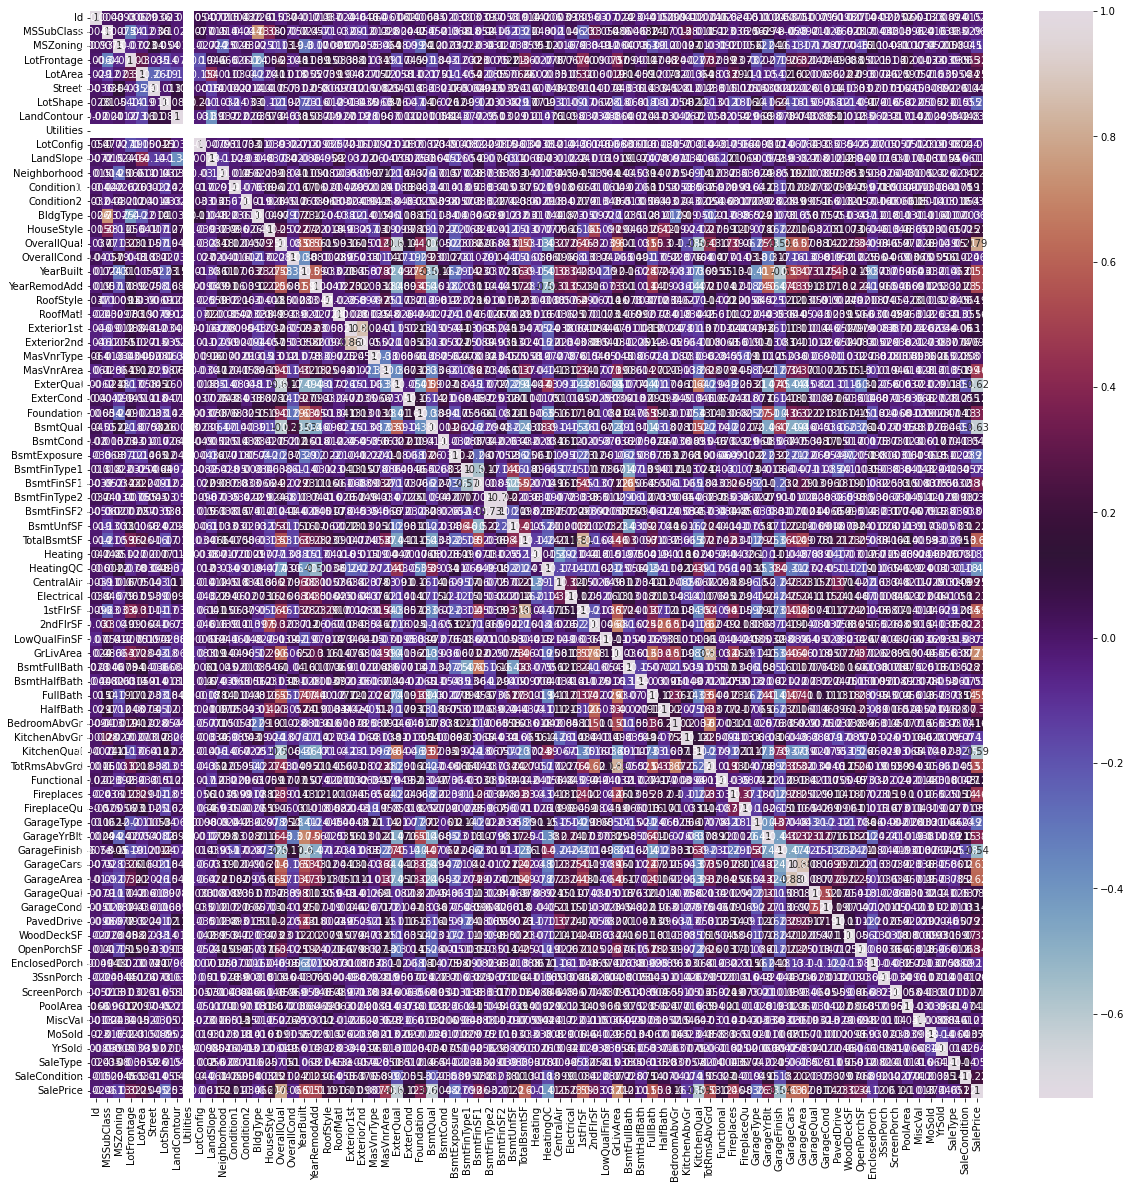

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='twilight')

Dropping the utilities column as it is irrelevant

In [58]:
train.drop('Utilities',axis=1,inplace=True)
test.drop('Utilities',axis=1,inplace=True)

Checking the correlation of target variable with other columns

In [59]:
corr['SalePrice'].sort_values()

BsmtQual        -0.626850
ExterQual       -0.624820
KitchenQual     -0.592468
GarageFinish    -0.537121
HeatingQC       -0.406604
BsmtExposure    -0.268559
GarageType      -0.258703
LotShape        -0.248171
MSZoning        -0.133221
KitchenAbvGr    -0.132108
EnclosedPorch   -0.115004
Heating         -0.100021
BsmtFinType1    -0.092109
BldgType        -0.066028
OverallCond     -0.065642
MSSubClass      -0.060775
LotConfig       -0.060452
SaleType        -0.050851
YrSold          -0.045508
LowQualFinSF    -0.032381
Id              -0.023897
MiscVal         -0.013071
BsmtHalfBath    -0.011109
BsmtFinSF2      -0.010151
MasVnrType       0.007732
LandSlope        0.015485
BsmtFinType2     0.032285
LandContour      0.032836
Condition2       0.033956
Street           0.044753
BsmtCond         0.048125
3SsnPorch        0.060119
MoSold           0.072764
GarageQual       0.080795
FireplaceQu      0.082705
Exterior2nd      0.097541
ScreenPorch      0.100284
PoolArea         0.103280
Condition1  

# Checking the skewness

In [60]:
train.skew()

Id                0.026526
MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
LotShape         -0.603775
LandContour      -3.125982
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrType       -0.104609
MasVnrArea        2.834658
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtCond         -3.293554
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF1        1.871606
BsmtFinType2     -3.615783
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
H

In [61]:
#sepearting the dependent and independent varaibles
x=train.iloc[:,:-1]
y=train.iloc[:,-1]

# Removing outliers

In [62]:
from scipy.stats import zscore
z=np.abs(zscore(train))
threshold=3
print(np.where(z>3))
train_new=train[(z<3).all(axis=1)]
train=train_new
train.shape

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([ 9, 20, 34, ..., 39, 62, 63], dtype=int64))


(482, 76)

# Model Building

In [63]:
#importing the different machine learning models

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [64]:
# defining the different models

lg=LinearRegression()
rdr=RandomForestRegressor()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

Finding the best random state

In [65]:
model=[lg,rdr,svr,dtr,knr]
maxAcc=0
maxRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best Accuracy score is', maxAcc , 'on random state', maxRS)

Best Accuracy score is 0.878165525517784 on random state 49


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49,test_size=.20)

# Linear Regression

In [67]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=r2_score(y_test,pred1)
print('Accuracy Score: ',acc)

Accuracy Score:  0.878165525517784


# Decision Tree Regressor

In [68]:
dtr.fit(x_train,y_train)
pred2=dtr.predict(x_test)
acc=r2_score(y_test,pred2)
print('Accuracy Score: ',acc)

Accuracy Score:  0.7696689675433733


# Support Vector Regressor

In [69]:
svr.fit(x_train,y_train)
pred3=svr.predict(x_test)
acc=r2_score(y_test,pred3)
print('Accuracy Score: ',acc)

Accuracy Score:  -0.04448045974699366


# KNeighbor Regressor

In [70]:
knr.fit(x_train,y_train)
pred4=knr.predict(x_test)
acc=r2_score(y_test,pred4)
print('Accuracy Score: ',acc)

Accuracy Score:  0.6839964008801616


# Random Forest Regressor

In [71]:
rdr.fit(x_train,y_train)
pred5=rdr.predict(x_test)
acc=r2_score(y_test,pred5)
print('Accuracy Score: ',acc)

Accuracy Score:  0.8686285196940373


# Cross Val Score

In [72]:
from sklearn.model_selection import cross_val_score
for i in range(3,7):
    cr=cross_val_score(rdr,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  3
cross val score =  85.86164484620339
at cv=  4
cross val score =  83.32130007580524
at cv=  5
cross val score =  84.26502021182698
at cv=  6
cross val score =  84.89897354649018


# Hypermeter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV
# creating parameters
para={'criterion':['squared_error','absolute_error','poisson'],
     'max_features':['sqrt','log2'],
     'max_depth':[1,2,3,4,5]}

GCV=GridSearchCV(rdr,para,cv=3,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'squared_error', 'max_depth': 1, 'max_features': 'sqrt'}

In [75]:
GCV_pred=GCV.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.5070734422369281

In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
l1=[pred1,pred2,pred3,pred4,pred5]
for i in l1:
    print('error:')

    print('mean absolute error: ',mean_absolute_error(y_test,i))
    print('mean squared error: ',mean_squared_error(y_test,i))
    print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,i)))
    print('\n')

error:
mean absolute error:  18830.68171149887
mean squared error:  739701676.0659795
root mean squared error:  27197.457161763847


error:
mean absolute error:  25242.884615384617
mean squared error:  1398423980.4230769
root mean squared error:  37395.50748984531


error:
mean absolute error:  55819.320136731076
mean squared error:  6341423065.81535
root mean squared error:  79633.05259636446


error:
mean absolute error:  29766.933333333334
mean squared error:  1918573481.8099146
root mean squared error:  43801.52373844904


error:
mean absolute error:  17703.964914529915
mean squared error:  797604328.1885209
root mean squared error:  28241.88960017585




We have seen that the random forest regressor has the least error

# Saving the model

In [77]:
import pickle
filename='house_price.pkl'
pickle.dump(rdr, open(filename,'wb'))

# Conclusion

In [78]:
a=np.array(y_test)
pred=np.array(pred5)
Sale_Price=pd.DataFrame({'Actual':a,'Predicted':pred})
Sale_Price

Actual  Predicted
0    122000  183855.15
1    174000  177328.74
2    180000  173180.53
3    109900  111880.09
4    197000  180170.60
5    112000   96080.06
6    466500  379808.78
7    284000  282961.94
8    208900  198808.80
9    380000  390365.52
10   175500  167501.67
11    98000  104956.68
12   160000  156494.96
13   140000  148829.85
14   216500  209005.00
15   128500  132158.08
16   110500  129347.15
17   136000  153445.15
18   485000  462079.00
19   108000  119031.50
20   143000  140051.33
21   253293  401958.80
22   155000  142734.50
23   227680  217198.78
24   102000  116213.04
25   212000  233372.92
26   163000  182482.75
27   116000  110625.73
28   269790  224628.03
29   135000  129708.87
30   107500  131681.30
31   124000  131954.38
32   232600  239530.35
33   369900  354219.22
34   124500  125300.50
35   383970  266516.35
36   262000  304308.35
37   185500  193568.41
38   108959  141208.36
39   147400  155174.59
40   125000  117247.20
41   245350  231774.12
42   317000  307096.94
43   181000  176775.58
44   248000  278463.11
45   143000  158844.34
46   160000  168069.84
47   266000  256631.52
48   190000  219183.45
49   315750  282163.57
50   132500  137395.37
51   107500  107055.43
52   225000  149618.12
53   145000  136618.00
54   146000  144147.04
55    82000   92981.14
56   255000  263386.86
57   149900  129772.29
58   180000  152442.93
59   310000  317614.88
60   189000  193288.10
61   251000  255493.44
62   277000  228448.49
63   228000  259323.31
64   170000  159824.34
65   106500  105899.57
66   190000  211209.30
67   164000  218186.45
68   235000  283951.72
69   556581  389667.51
70   141000  147277.85
71   200000  189928.67
72   451950  394415.47
73   100000  124112.64
74   223000  212384.72
75   148000  147001.50
76   118400  122066.10
77   121000  114231.34
78   135750  114115.01
79   105000  132681.54
80   165500  168970.50
81   125500  125821.83
82   187500  209778.94
83   214000  226029.06
84    95000   92704.33
85   205000  220716.28
86   171000  224573.31
87   122500  131929.04
88   266500  239574.11
89   204750  203009.60
90   165000  161584.39
91    83000   95724.87
92   109500  109029.25
93   392500  302202.48
94   110000  120280.91
95    88000  109944.25
96   241500  193432.36
97   125000  134452.00
98   167000  166739.25
99   135000  130317.70
100  102776  107333.21
101  175000  160765.05
102  193000  187144.35
103  194700  179821.34
104  153900  167501.34
105  193500  200741.80
106  119900  125859.37
107  140000  143180.60
108  197900  202427.70
109  142500  152820.62
110  131500  136622.00
111  135500  129563.01
112  109000  102712.13
113  155000  145093.15
114  115000  120986.20
115  278000  329904.81
116  310000  315339.39
117  100000   98585.50
118  105500  116932.76
119  134000  144293.50
120  170000  161157.87
121  152000  142018.93
122  299800  312081.46
123  130000  154876.40
124   98600  138689.50
125  141000  128113.34
126  187100  197762.33
127  311872  250082.50
128  172500  157556.92
129  119000  129480.27
130  243000  207501.23
131  176000  169802.93
132  149500  154155.82
133  177500  164986.48
134  108000  116018.05
135  137500  143745.21
136  255000  259303.48
137  159000  159709.00
138  149900  150851.50
139  160000  142805.15
140  259500  185716.61
141  157900  151531.00
142  139900  144378.39
143  110000  117950.04
144  189000  204224.00
145  345000  331070.99
146  200000  206063.10
147  152000  147291.00
148  145000  166468.60
149  286000  264895.23
150  315500  312217.68
151  165500  178636.25
152  138000  141787.27
153  274300  242820.05
154  145900  151520.78
155  220000  233270.93
156  128200  125655.91
157  140000  135088.23
158  279500  215233.45
159  215000  211731.99
160  125000  131411.91
161  175000  181694.18
162  139500  139060.53
163  230000  244740.68
164  185000  156975.00
165  235000  233228.54
166  250000  306946.97
167  183500  196789.73
168  185000  184062.03
169  124000  136573.50
170  176000  166264.74
171  180000  170606.49
172  131000  130435.50
173

# Loading the model for prediction

In [79]:
loaded_model = pickle.load(open(filename, 'rb'))
pred=loaded_model.predict(test)
pred

array([355727.36, 236421.63, 252985.85, 170415.17, 199721.32,  81307.04,
       135665.22, 320487.26, 228495.08, 168409.28,  73834.15, 145527.19,
       126693.17, 177151.5 , 332441.43, 124854.73, 116617.02, 125728.49,
       160221.  , 197176.33, 163048.6 , 147997.32, 142645.9 ,  75160.72,
       101131.83, 128321.7 , 179410.82, 150549.  , 160813.64, 109879.89,
       151976.73, 185307.4 , 234857.86, 160266.32, 104149.04, 166535.46,
       190763.98, 108632.36, 156600.04, 151229.9 , 104299.54, 327374.85,
       193297.05, 182722.06, 129252.12, 134616.66, 128467.99,  91589.1 ,
       208720.02, 317034.87, 146052.36, 187711.98, 104093.  ,  95075.3 ,
       263985.49, 110095.08, 144158.81, 183681.84, 110753.54, 259308.43,
        93862.61, 160112.62, 124937.47, 143227.33, 196417.49,  91343.93,
       151404.57, 197222.14, 133112.95, 164159.2 , 309959.82, 152374.33,
       182716.65, 153351.55, 138465.71, 237720.62, 324158.85, 208241.4 ,
       301682.5 , 138090.95, 215955.03, 138041.57, 

# Sale Price Prediction

In [80]:
House_price_prediction=pd.DataFrame(data=test)
House_price_prediction['Predicted_Price']=pred
House_price_prediction

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0     337          20         2    86.000000    14157       1         0   
1    1018         120         2    66.425101     5814       1         0   
2     929          20         2    66.425101    11838       1         3   
3    1148          70         2    75.000000    12000       1         3   
4    1227          60         2    86.000000    14598       1         0   
5     650         180         3    21.000000     1936       1         3   
6    1453         180         3    35.000000     3675       1         3   
7     152          20         2   107.000000    13891       1         3   
8     427          80         2    66.425101    12800       1         3   
9     776         120         3    32.000000     4500       1         3   
10     30          30         3    60.000000     6324       1         0   
11   1425          20         2    66.425101     9503       1         3   
12    423          20         2   100.000000    21750       1         3   
13   1185          20         2    50.000000    35133       0         3   
14    775          20         2   110.000000    14226       1         3   
15    391          50         2    50.000000     8405       1         3   
16   1408          20         2    66.425101     8780       1         0   
17    513          20         2    70.000000     9100       1         3   
18   1266         160         1    35.000000     3735       1         3   
19    173         160         2    44.000000     5306       1         0   
20   1150          70         3    50.000000     9000       1         3   
21    797          20         2    71.000000     8197       1         3   
22    137          20         2    66.425101    10355       1         0   
23    706         190         3    70.000000     5600       1         3   
24   1377          30         2    52.000000     6292       1         3   
25   1177          20         2    37.000000     6951       1         0   
26   1456          60         2    62.000000     7917       1         3   
27    369          20         2    78.000000     7800       1         3   
28   1421          60         2    90.000000    11700       1         3   
29    999          30         3    60.000000     9786       1         3   
30   1217          90         3    68.000000     8930       1         3   
31    937          20         2    67.000000    10083       1         3   
32    769          20         2    70.000000     9100       1         3   
33    831          20         2    80.000000    11900       1         0   
34    678          30         2    52.000000     9022       1         3   
35    574          80         2    76.000000     9967       1         0   
36    921          60         2    70.000000     8462       1         0   
37   1292         160         3    21.000000     1680       1         3   
38   1277          60         2    66.425101    12936       1         0   
39    676         160         2    24.000000     2289       1         3   
40    108          20         3    50.000000     6000       1         3   
41    424          60         2    80.000000     9200       1         3   
42    823          60         2    66.425101    12394       1         0   
43   1455          20         1    62.000000     7500       1         3   
44    377          85         2    57.000000     8846       1         0   
45   1256          50         3    52.000000     6240       1         3   
46   1120          20         2    70.000000     7560       1         3   
47    265          30         3    30.000000     5232       1         2   
48   1158         120         2    34.000000     5001       1         0   
49    725          20         2    86.000000    13286       1         0   
50   1378          50         2    60.000000    10998       1         3   
51   1139          20         2    66.425101     9819       1         0   
52    122          50         3 

# Thank you 